# 発表資料などの資料作成に必要な素材を生成するためのノート


In [ ]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [ ]:
summarized_ = return_summarized_Fixed_dataframe()
print(summarized_)
indices = summarized_.index.values
columns = summarized_.columns.values
print(indices)
print(columns)

plt.figure()
for row in indices:
    print(summarized_.loc[row].to_numpy())
    plt.plot(columns, summarized_.loc[row].to_numpy())

In [ ]:
return_summarized_Fixed_dataframe(BenchMark_name="cg").to_csv("./tmp_GenerateResources/SummarizedFixedDataframe_cg.csv")

In [ ]:
path = "./tmp_GenerateResources/"

In [ ]:
def generateScoreTable(benchmark_name="cg"):
    list_ScoreTable = []
    dict_summary_fixed_class = return_dict_summary_fixed(benchmark_name=benchmark_name, fixed="class")
    raw_x = dict_summary_fixed_class["processes"]
#     print(f"raw_x : {raw_x}, benchmark : {benchmark_name}")
    for content in dict_summary_fixed_class:
        if(content == "processes"):
            continue
        raw_y = dict_summary_fixed_class[content]
        if(does_include_nan(raw_y)):
            continue
#         print(f"raw_y(={content}) : {raw_y}")
        # 線形モデル
        model_lin = ModelLin(raw_x, raw_y, benchmark_name, content)
        model_lin.calc_lr()
        model_lin.calc_r2_score()
        model_lin.calc_mae_score()
        model_lin.calc_mse_score()
        model_lin.calc_rmse_score()
        model_lin.calc_mape_score()
        model_lin.plot_graph()
        plt.title(f"ベンチマーク名：{model_lin.benchmark_name}, 関数名：{model_lin.function_name}, MAPE : {model_lin.mape_score}", y=-0.2)
        plt.show()
        # logモデル
        model_log10 = ModelLog10(raw_x, raw_y, benchmark_name, content)
        model_log10.calc_lr()
        model_log10.calc_r2_score()
        model_log10.calc_mae_score()
        model_log10.calc_mse_score()
        model_log10.calc_rmse_score()
        model_log10.calc_mape_score()
        model_log10.plot_graph()
        if(model_log10.benchmark_name == "cg" and model_log10.function_name == "MPI_Irecv()"):
            plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.png')
        if(model_log10.benchmark_name == "cg" and model_log10.function_name == "ICNVRT"):
            plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.png')
        plt.title(f"ベンチマーク名：{model_log10.benchmark_name}, 関数名：{model_log10.function_name}, MAPE : {model_log10.mape_score}", y=-0.2)
        plt.show()
        # 反比例モデル
        model_ip = ModelIP(raw_x, raw_y, benchmark_name, content)
        model_ip.calc_lr()
        model_ip.calc_r2_score()
        model_ip.calc_mae_score()
        model_ip.calc_mse_score()
        model_ip.calc_rmse_score()
        model_ip.calc_mape_score()
        model_ip.plot_graph()
        if(model_log10.benchmark_name == "lu" and model_log10.function_name == "EXACT"):
            plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.png')
        plt.title(f"ベンチマーク名：{model_ip.benchmark_name}, 関数名：{model_ip.function_name}, MAPE : {model_ip.mape_score}", y=-0.2)
        plt.show()
        list_ScoreTable.append([content, model_lin.mape_score, model_log10.mape_score, model_ip.mape_score])
    df_ScoreTable = pd.DataFrame(list_ScoreTable)
    df_ScoreTable.columns = ["", "x mape", "logx mape", "1/x mape"]
    df_ScoreTable.set_index("",inplace=True)
    df_ScoreTable

In [ ]:
for benchmark in benchmarks:
    generateScoreTable(benchmark)

# 資料作成に使用する最もフィットするモデルはどれかを示すための表・グラフを作るためのプログラム


In [ ]:
def return_list_of_ratio_row(input_list):
    sum_of_input_list = 0
    return_list = []
    for list_child in input_list:
        sum_of_input_list += len(list_child)
    for list_child in input_list:
        num = int(len(list_child)/sum_of_input_list*10000)/100
        return_list.append(num)
    # 総和を100にする処理
    # 最大になることの多い線形モデルはほかのモデルの割合の総和を100から引いたものにしている
    i_0 = 100
    for i in range(1, len(input_list)):
        i_0 -= return_list[i]
    return_list[0] = i_0
    return(return_list)

def return_list_of_range_row(input_list):
    return_list = []
    for list_child in input_list:
        if(len(list_child) == 0):
            data_str = "(NoData)"
        else:
            min_data = int(min(list_child)*100)/100
            max_data = int(max(list_child)*100)/100
            data_str = f"({min_data}-{max_data})"
        return_list.append(data_str)
    return(return_list)


In [ ]:
def return_row_list(input_list):
    return_list = []
    # 割合の入ったリストと最小・最大値の入ったリスト
    list_of_ratio_row = return_list_of_ratio_row(input_list)
    list_of_range_row = return_list_of_range_row(input_list)
    
    # 上の二つのリストの要素同士を結合させる
    for i in range(len(list_of_ratio_row)):
        return_list.append(f"{list_of_ratio_row[i]}%{list_of_range_row[i]}")
    
    return return_list

In [ ]:
csv_directory_path = './tmp_GenerateResources/'

result_of_all = [[], [], []]
list_for_csv = []

list_for_csv_ratio = []
list_for_csv_range = []

for benchmark in benchmarks:
    result_of_benchmark = [[], [], []]
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    # ファイルが存在しない場合は処理を飛ばす
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # 完全に値をとれたもののみで集計するようにしている
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    # 現在処理中のベンチマーク名を出力
    print(benchmark)
    df = pd.read_csv(file_path, index_col=0)
    columns = df.columns.values
    indices = df.index.values
    for index in indices:
        row = df.loc[index].tolist()
        result_of_benchmark[row.index(min(row))].append(min(row))
        result_of_all[row.index(min(row))].append(min(row))
    list_for_csv.append([benchmark]+return_row_list(result_of_benchmark))
list_for_csv.append(["all"]+return_row_list(result_of_all))

In [ ]:
print(list_for_csv)

In [ ]:
csv_head = ["", "線形モデル", "対数モデル", "反比例モデル"]
df_for_csv = pd.DataFrame(list_for_csv)
df_for_csv.columns = csv_head
df_for_csv.set_index("")
df_for_csv

In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

ICNVRT@cg


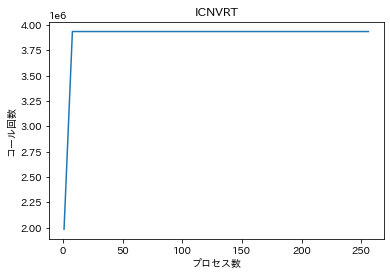

CFFTZ@ft


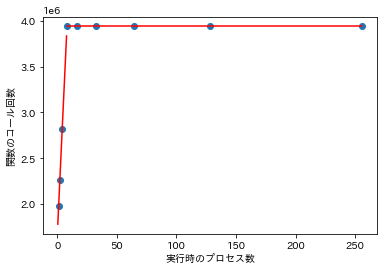

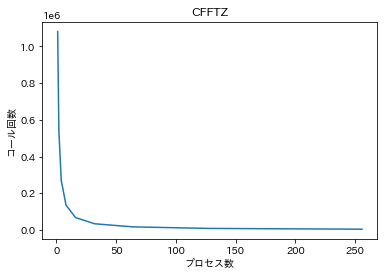

RHS@lu


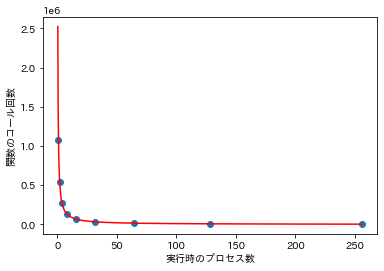

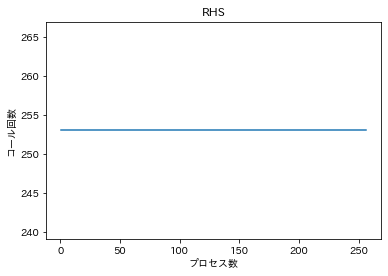

BUBBLE@mg


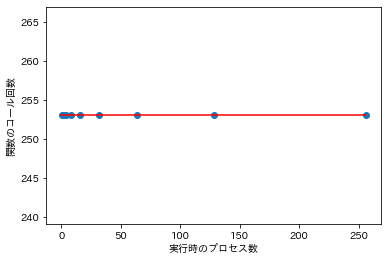

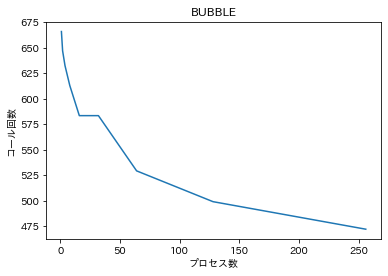

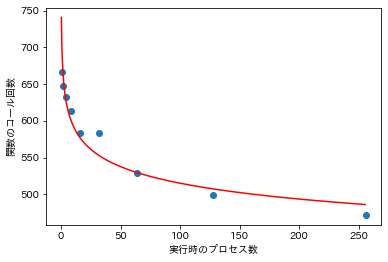

In [6]:
for benchmark in benchmarks:
    SummarizedDF= return_summarized_Fixed_dataframe(BenchMark_name =benchmark, fixed="class")
    SummarizedDFIndex = SummarizedDF.index.tolist()
    SummarizedDFColumns = SummarizedDF.columns.tolist()
    x_list = SummarizedDFColumns
    targetFunctions=["RHS", "CFFTZ", "ICNVRT", "BUBBLE"]
    for FunctionNames in SummarizedDFIndex:
        y_list = SummarizedDF.loc[FunctionNames].tolist()
        if(FunctionNames in targetFunctions and (does_include_nan(y_list))==False):
            print(f"{FunctionNames}@{benchmark}")
            plt.figure()
            plt.title(FunctionNames)
            plt.plot(x_list,y_list)
            plt.xlabel('プロセス数')
            plt.ylabel('コール回数')
            plt.show()
            if(FunctionNames=="RHS"):
                modelLin = ModelLin(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
                modelLin.train_x = modelLin.raw_x
                modelLin.train_y = modelLin.raw_y
                modelLin.calc_lr()
                modelLin.plot_graph()
            elif(FunctionNames=="BUBBLE"):
                modelLog10 = ModelLog10(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
                modelLog10.train_x = modelLog10.raw_x
                modelLog10.train_y = modelLog10.raw_y
                modelLog10.calc_lr()
                modelLog10.plot_graph()
            elif(FunctionNames=="CFFTZ"):
                modelIP = ModelIP(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
                modelIP.train_x = modelIP.raw_x
                modelIP.train_y = modelIP.raw_y
                modelIP.calc_lr()
                modelIP.plot_graph()
            elif(FunctionNames=="ICNVRT"):
                modelBranch = ModelBranch(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
                modelBranch.train_x = modelBranch.raw_x
                modelBranch.train_y = modelBranch.raw_y
                modelBranch.calc_lr()
                modelBranch.plot_graph()            